# Optimal selection of constrain categories

M. Esteban Muñoz H. <marcelo.hidalgo@hcu-hamburg.de>

HafenCity Universität – Infrastrukturplanung und Stadttechnik

#Table of Contents
* [1. Re-weighting results for 4 small areas](#1.-Re-weighting-results-for-4-small-areas)
	* [1.1 load the simulation data](#1.1-load-the-simulation-data)
	* [1.2 Load the original census data from R.](#1.2-Load-the-original-census-data-from-R.)
* [2. Plot the result](#2.-Plot-the-result)


# 1. Re-weighting results for 4 small areas

In order to perform a re-weighting of the survey design weights with a GREGWT method I need to define which category of each variable should be used as a "reference" category (i.e this category won't be use as a constrain). This is important because the resulting performance of the method (measured as Total Absolute Error TAD) is influenced by the selection of the reference category.

Needed libraries to read and plot the resulting data from the re-weighting process.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns # statistical graphics in Python
%matplotlib inline
pd.options.display.mpl_style = 'default'
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

## 1.1 load the simulation data

Load the data. This data contains the result from all possible combination of categories to be used as reference categories in the re-weighting process. I perform this computation 2 times. The first time the area population is not used as a benchmark, for the second computation the area population was included as a constrain. 

In [39]:
#result = pd.read_csv("./Simulation-Result-opt3.csv",
#                     index_col=["area", "cat1", "cat2", "cat3"],
#                     usecols=["area", "cat1", "cat2", "cat3", "PSAE"])
#result = result.sort_index();
#result["PSAE"] = result["PSAE"] #/ 588

In [40]:
#result_pop = pd.read_csv("./Simulation-Result-opt6.csv",
result_pop = pd.read_csv("./Simulation-Result-opt7.csv",
                     #index_col=["area", "cat1", "cat2", "cat3"],
                     usecols=["area", "cat1", "cat2", "cat3", "PSAE"])
#result_pop = result_pop.sort_index();
#result_pop["PSAE"] = result_pop["PSAE"] #/ 588

In [41]:
result_pop = result_pop[-np.isnan(result_pop["PSAE"])]

In [42]:
result_pop.fillna("-", inplace=True)

In [43]:
result_pop["allcat"] = result_pop["cat1"] + result_pop["cat2"] + result_pop["cat3"] + result_pop["area"].astype(str)

In [44]:
result_pop = result_pop.drop_duplicates("allcat")

In [45]:
del(result_pop["allcat"])

In [46]:
#result_pop.loc[(result_pop["cat1"] == "75.and.over") &
#               (result_pop["cat2"] == "Divorced") &
#               (result_pop["area"] == 2),:]

Lowest combination of categories, measured by the $PSAE$.

In [47]:
#result[-result["PSAE"].isnull()].loc[2].sort("PSAE").head()

**Table 1:** Lowest $PSAE$ for combination of categories used as reference for area 02.

In [48]:
result_pop = result_pop[-result_pop["PSAE"].isnull()]

In [49]:
#result[-result["PSAE"].isnull()].loc[11].sort("PSAE").head()

**Table 2:** Lowest $PSAE$ for combination of categories used as reference for area 11.

In [50]:
#result[-result["PSAE"].isnull()].loc[4011].sort("PSAE").head()

**Table 3:** Lowest $PSAE$ for combination of categories used as reference for area 4011.

In [51]:
#result[-result["PSAE"].isnull()].loc[4012].sort("PSAE").head()

**Table 4:** Lowest $PSAE$ for combination of categories used as reference for area 4012.

In [52]:
#cat = pd.DataFrame({
#    "02":   result[-result["PSAE"].isnull()].sort("PSAE").loc[2].ix[0],
#    "11":   result[-result["PSAE"].isnull()].sort("PSAE").loc[11].ix[0],
#    "4011": result[-result["PSAE"].isnull()].sort("PSAE").loc[4011].ix[0],
#    "4012": result[-result["PSAE"].isnull()].sort("PSAE").loc[4012].ix[0]})
#cat

**Table 5:** Lowest achieved $PSAE$ for each area.

## 1.2 Load the original census data from R.

In [53]:
data = pd.read_csv("Zensus-2011-clean.csv", index_col=1)

In [54]:
del(data['Unnamed: 0'])

In [55]:
data.loc[[2,11,4011,4012]]

,Under.3,3...5,6...14,15...17,18...24,25...29,30...39,40...49,50...64,65...74,...,Widowed,Divorced,Party.to.a.civil.union,Civil.union.terminated,1.person,2.persons,3.persons,4.persons,5.persons,6.or.more.people
Area.Code,,,,,,,,,,,,,,,,,,,,,
2,47757,45575,132476,42239,138325,136313,258238,280671,301189,178471,...,104503,143354,3353,412,400440,528441,303930,264486,103963,67650
11,94867,86753,239171,73592,271412,263554,464285,539688,624691,376088,...,196801,333989,8709,930,860542,1092332,582501,427341,163306,119185
4011,12996,12714,41156,14431,49366,39910,68692,85587,104168,62164,...,38945,48267,795,60,121056,172867,98675,84504,33651,22602
4012,2643,2822,8919,3199,9296,6757,12021,16093,22277,13100,...,9161,9723,89,15,26444,34910,18396,15138,6721,4994


**Table 6:** Original census data.

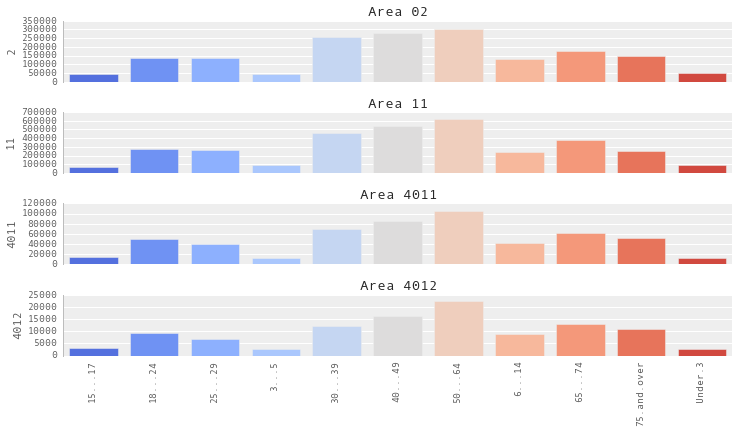

In [56]:
x1 = data.ix[2, "Under.3":"75.and.over"].astype(float)
x2 = data.ix[11, "Under.3":"75.and.over"].astype(float)
x3 = data.ix[4011, "Under.3":"75.and.over"].astype(float)
x4 = data.ix[4012, "Under.3":"75.and.over"].astype(float)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 6), sharex=True)
sns.barplot(x1.index, x1, ci=None, palette="coolwarm", hline=.1, ax=ax1)
ax1.set_xlabel("")
ax1.set_title("Area 02")
sns.barplot(x2.index, x2, ci=None, palette="coolwarm", hline=.1, ax=ax2)
ax2.set_xlabel("")
ax2.set_title("Area 11")
sns.barplot(x3.index, x3, ci=None, palette="coolwarm", hline=.1, ax=ax3)
ax3.set_xlabel("")
ax3.set_title("Area 4011")
sns.barplot(x4.index, x4, ci=None, palette="coolwarm", hline=.1, ax=ax4)
ax4.set_xlabel("")
ax4.set_title("Area 4012")
sns.despine(bottom=True)
plt.xticks(rotation=90);

**Figure 1:** Original **age** data for all four areas from the census.

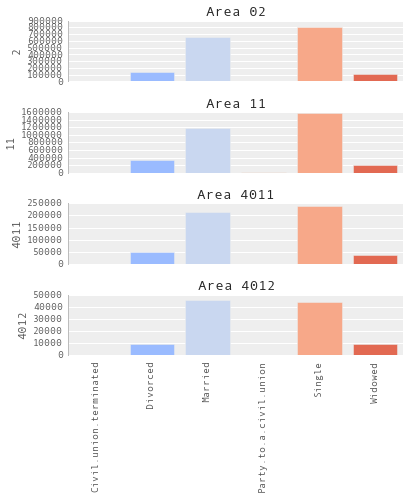

In [57]:
x1 = data.ix[2, "Single":"Civil.union.terminated"].astype(float)
x2 = data.ix[11, "Single":"Civil.union.terminated"].astype(float)
x3 = data.ix[4011, "Single":"Civil.union.terminated"].astype(float)
x4 = data.ix[4012, "Single":"Civil.union.terminated"].astype(float)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 6), sharex=True)
sns.barplot(x1.index, x1, ci=None, palette="coolwarm", hline=.1, ax=ax1)
ax1.set_xlabel("")
ax1.set_title("Area 02")
sns.barplot(x2.index, x2, ci=None, palette="coolwarm", hline=.1, ax=ax2)
ax2.set_xlabel("")
ax2.set_title("Area 11")
sns.barplot(x3.index, x3, ci=None, palette="coolwarm", hline=.1, ax=ax3)
ax3.set_xlabel("")
ax3.set_title("Area 4011")
sns.barplot(x4.index, x4, ci=None, palette="coolwarm", hline=.1, ax=ax4)
ax4.set_xlabel("")
ax4.set_title("Area 4012")
sns.despine(bottom=True)
plt.xticks(rotation=90);

**Figure 2:** Original **marital status** data for all four areas from the census.

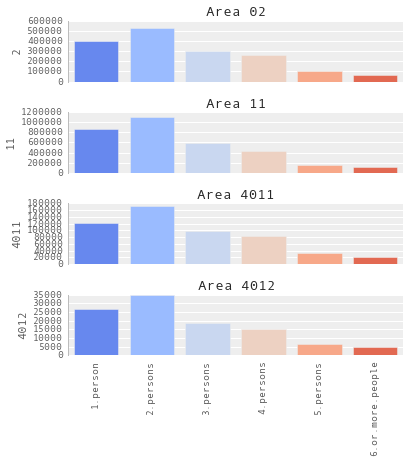

In [58]:
x1 = data.ix[2, "1.person":"6.or.more.people"].astype(float)
x2 = data.ix[11, "1.person":"6.or.more.people"].astype(float)
x3 = data.ix[4011, "1.person":"6.or.more.people"].astype(float)
x4 = data.ix[4012, "1.person":"6.or.more.people"].astype(float)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 6), sharex=True)
sns.barplot(x1.index, x1, ci=None, palette="coolwarm", hline=.1, ax=ax1)
ax1.set_xlabel("")
ax1.set_title("Area 02")
sns.barplot(x2.index, x2, ci=None, palette="coolwarm", hline=.1, ax=ax2)
ax2.set_xlabel("")
ax2.set_title("Area 11")
sns.barplot(x3.index, x3, ci=None, palette="coolwarm", hline=.1, ax=ax3)
ax3.set_xlabel("")
ax3.set_title("Area 4011")
sns.barplot(x4.index, x4, ci=None, palette="coolwarm", hline=.1, ax=ax4)
ax4.set_xlabel("")
ax4.set_title("Area 4012")
sns.despine(bottom=True)
plt.xticks(rotation=90);

**Figure 3:** Original **household size** data for all four areas from the census.

# 2. Plot the result

Plot the performance for all four areas.

In [59]:
#f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
#result.loc[2].sort("PSAE", ascending=False).plot(rot=90, ax=ax1);
#ax1.set_title("Area 02")
#ax1.set_xlabel("")
#result.loc[11].sort("PSAE", ascending=False).plot(rot=90, ax=ax2);
#ax2.set_title("Area 11")
#ax2.set_xlabel("")
#result.loc[4011].sort("PSAE", ascending=False).plot(rot=90, ax=ax3);
#ax3.set_title("Area 4011")
#ax3.set_xlabel("")
#result.loc[4012].sort("PSAE", ascending=False).plot(rot=90, ax=ax4);
#ax4.set_title("Area 4012")
#ax4.set_xlabel("");
#plt.savefig("FIGURES/performance.pdf", format="pdf")

**Figure 4.** Performance of the re-weighting process depending of defined reference categories.

In [60]:
result_pop = result_pop.sort("PSAE", ascending=False)

In [61]:
#result_pop = result_pop.loc[result_pop["area"] == 2, "PSAE"].sort("PSAE")

In [62]:
#result_pop.loc[result_pop["area"] == 2,"PSAE"]

In [63]:
result_pop.head()

,cat1,cat2,cat3,area,PSAE
491,3...5,-,6.or.more.people,4012,1.377269
1635,15...17,-,6.or.more.people,4012,1.376122
459,Under.3,-,6.or.more.people,4012,1.375121
1131,25...29,-,6.or.more.people,4012,1.365318
839,6...14,-,6.or.more.people,4012,1.364736


In [64]:
result_pop.shape[0]

2044

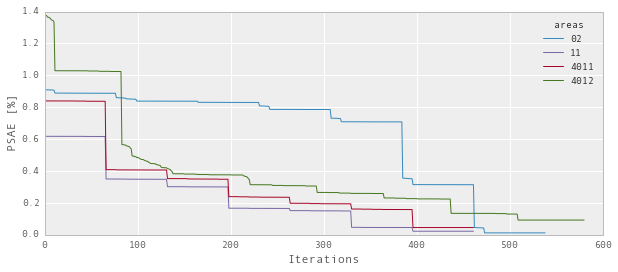

In [65]:
#f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
f, (ax1) = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
#result_pop.loc[0].sort("PSAE", ascending=False).plot(rot=90, ax=ax1);

#result_pop.loc[result_pop["area"] == 2,"PSAE"].plot(rot=90, ax=ax1);
y = result_pop.loc[result_pop["area"] == 2, "PSAE"]
x = [i for i in range(len(y))]
ax1.plot(x, y, label="02")
#ax1.set_title("Area 02")
#ax1.set_xlabel("")

#result_pop.loc[1].sort("PSAE", ascending=False).plot(rot=90, ax=ax2);
y = result_pop.loc[result_pop["area"] == 11, "PSAE"]
x = [i for i in range(len(y))]
ax1.plot(x, y, label="11")
#ax2.set_title("Area 11")
#ax2.set_xlabel("")

#result_pop.loc[2].sort("PSAE", ascending=False).plot(rot=90, ax=ax3);
y = result_pop.loc[result_pop["area"] == 4011, "PSAE"]
x = [i for i in range(len(y))]
ax1.plot(x, y, label="4011")
#ax3.set_title("Area 4011")
#ax3.set_xlabel("")

#result_pop.loc[3].sort("PSAE", ascending=False).plot(rot=90, ax=ax4);
y = result_pop.loc[result_pop["area"] == 4012, "PSAE"]
x = [i for i in range(len(y))]
ax1.plot(x, y, label="4012")
#ax4.set_title("Area 4012")
ax1.set_xlabel("Iterations");

ax1.set_ylabel("PSAE [%]");

ax1.legend(loc="best", title="areas")

plt.savefig("FIGURES/performance_pop.pdf", format="pdf", bbox_inches='tight')

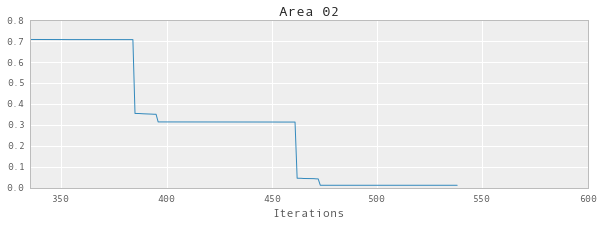

In [66]:
f, ax1 = plt.subplots(1, 1, figsize=(10, 3), sharex=True)
#result_pop.loc[0].sort("PSAE", ascending=False).plot(rot=90, ax=ax1);

#result_pop.loc[result_pop["area"] == 2,"PSAE"].plot(rot=90, ax=ax1);
y = result_pop.loc[result_pop["area"] == 2, "PSAE"]
y = y[335:]
x = [i for i in range(335, len(y)+335)]
ax1.plot(x, y)
ax1.set_xlim(335,600)
ax1.set_title("Area 02")
ax1.set_xlabel("Iterations");
plt.savefig("FIGURES/performance_pop_sub1.pdf", format="pdf")

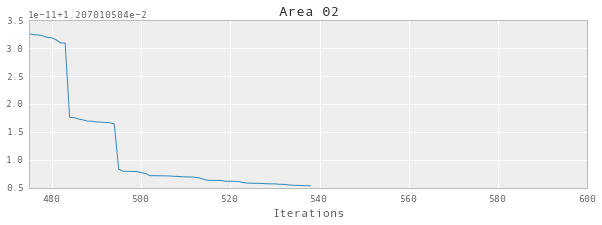

In [67]:
f, ax1 = plt.subplots(1, 1, figsize=(10, 3), sharex=True)
#result_pop.loc[0].sort("PSAE", ascending=False).plot(rot=90, ax=ax1);

#result_pop.loc[result_pop["area"] == 2,"PSAE"].plot(rot=90, ax=ax1);
y = result_pop.loc[result_pop["area"] == 2, "PSAE"]
y = y[475:]
x = [i for i in range(475, len(y)+475)]
ax1.plot(x, y)
ax1.set_xlim(475,600)
ax1.set_title("Area 02")
ax1.set_xlabel("Iterations");
plt.savefig("FIGURES/performance_pop_sub2.pdf", format="pdf")

**Figure 5.** Performance of the re-weighting process depending of defined reference categories, using area population as a constrain.

For each area there is a unique combination of categories constrains that result on the "optimal" TAE.

In [68]:
#optcat = result.loc[2].sort(["PSAE"]).ix[[0],0]
#optcat = optcat.append(result.loc[11].sort(["PSAE"]).ix[[0],0])
#optcat = optcat.append(result.loc[4011].sort(["PSAE"]).ix[[0],0])
#optcat = optcat.append(result.loc[4012].sort(["PSAE"]).ix[[0],0])
#optcat = pd.DataFrame(optcat)
#optcat["area"] = ["2", "11", "4011", "4012"]

In [69]:
y = result_pop.loc[result_pop["area"] == 2, "PSAE"]

In [70]:
result_pop.loc[result_pop["area"] == 2, "PSAE"].min()

0.012070105045368399

**Table 7:** Optimal categories for each area, without having area population as a constrain.

In [71]:
result_pop.loc[(result_pop["area"] == 2) &
               (result_pop["PSAE"] == result_pop.loc[result_pop["area"] == 2, "PSAE"].min())]

,cat1,cat2,cat3,area,PSAE
372,30...39,Widowed,-,2,0.01207


In [72]:
result_pop.loc[(result_pop["area"] == 11) &
               (result_pop["PSAE"] == result_pop.loc[result_pop["area"] == 11, "PSAE"].min())]

,cat1,cat2,cat3,area,PSAE
1353,25...29,Married,-,11,0.022446


In [73]:
result_pop.loc[(result_pop["area"] == 4011) &
               (result_pop["PSAE"] == result_pop.loc[result_pop["area"] == 4011, "PSAE"].min())]

,cat1,cat2,cat3,area,PSAE
486,18...24,Divorced,-,4011,0.045513


In [74]:
result_pop.loc[(result_pop["area"] == 4012) &
               (result_pop["PSAE"] == result_pop.loc[result_pop["area"] == 4012, "PSAE"].min())]

,cat1,cat2,cat3,area,PSAE
2003,-,Married,-,4012,0.092459


**Table 9:** Optimal categories for each area, having area population as a constrain.

In [75]:
result_pop.head()

,cat1,cat2,cat3,area,PSAE
491,3...5,-,6.or.more.people,4012,1.377269
1635,15...17,-,6.or.more.people,4012,1.376122
459,Under.3,-,6.or.more.people,4012,1.375121
1131,25...29,-,6.or.more.people,4012,1.365318
839,6...14,-,6.or.more.people,4012,1.364736
